In [85]:
# To support python version
import sys
assert sys.version_info >= (3, 5)

# Import library
import numpy as np #import numpy module
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
import sklearn.linear_model
import random

# To make this notebook's output stable acroess runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tugas_1"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [86]:
# Load the dataset
dataset = pd.read_csv('el4233-2018-2019-02-01-training.csv', header = None)
print(dataset)

            0         1
0    0.360539 -1.790432
1    0.038950  0.745912
2    0.926437 -0.585759
3    1.449868 -0.569869
4    0.840407 -2.412565
5    0.970854 -0.440285
6    0.025562  0.592882
7    0.974743  0.199745
8    1.883613 -1.007853
9    1.701590  0.233468
10   1.459929  0.101995
11   0.217472  1.503574
12   1.787808  1.193271
13   1.714308  1.348063
14   0.330173 -0.870303
15   1.264668 -0.920761
16   0.040967  1.873501
17   0.233475  0.865656
18   0.632735  0.835648
19   0.315825 -1.154777
20   1.517959  0.160509
21   1.636551  0.850285
22   0.689249  0.322936
23   0.637598  1.162256
24   0.223322  1.314271
25   0.167906  2.074165
26   1.425452  0.087272
27   1.199087 -0.203360
28   0.111347  0.648798
29   0.959595 -0.228698
..        ...       ...
970  1.581237  1.680498
971  1.979703 -0.324692
972  0.495949 -0.309745
973  0.783114 -1.634726
974  0.968996 -0.824075
975  0.973949 -1.080997
976  0.471551 -1.014063
977  0.659609  1.416125
978  0.178571  1.707258
979  1.144471  0

In [87]:
# Split the dataset into training set and validation set
# I split into 80% for training data and 20% for validation data
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(dataset[0], dataset[1], test_size = 0.2, random_state = 0)

x_train = x_train[:,np.newaxis]
x_valid = x_valid[:,np.newaxis]
x_train.shape

(800, 1)

Saving figure dataset and model


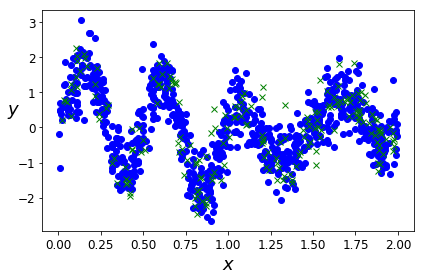

In [88]:
# Viualize the data adn the model
plt.plot(x_train, y_train, "bo", label = 'training set') #training set
plt.plot(x_valid, y_valid, "gx", label = 'validation set') #validation set

#show the training set graphics
plt.xlabel("$x$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
# plt.axis([0, 1, -1.5, 1.5])
save_fig("dataset and model")
plt.show()

In [89]:
report_train_mse = np.zeros(100)
report_test_mse = np.zeros(100)

In [90]:
# Making the model
derajat_polinom = 29
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = derajat_polinom, include_bias = False)
train_x_poly = poly_features.fit_transform(x_train)

In [91]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_x_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(-0.07352939552874115,
 array([ 3.47794228e+01, -6.13235126e+02,  7.18055659e+03, -4.27629570e+04,
         1.27265730e+05, -1.83496910e+05,  8.13728434e+04,  8.38875178e+04,
        -6.88021438e+04, -5.75977053e+04,  4.28992521e+04,  5.11952157e+04,
        -2.26512621e+04, -5.03166099e+04,  5.45961967e+03,  5.09310069e+04,
         1.17752535e+04, -4.98329209e+04, -2.67594200e+04,  4.92664214e+04,
         3.39100624e+04, -5.86439055e+04, -1.96495638e+04,  8.15884219e+04,
        -7.04550909e+04,  3.22312539e+04, -8.61128816e+03,  1.27698859e+03,
        -8.17807241e+01]))

In [92]:
train_y_predict = lin_reg.predict(train_x_poly)
train_y_predict.shape
print(train_y_predict)

[ 0.97976928  0.19227435  1.1689445   0.18586033 -0.74399943 -0.37528721
 -0.31811932 -0.71493813 -1.54534778  1.32093172 -0.90324851 -0.68642575
  0.7359346   0.55217197  0.15346813  0.88613819 -0.57368279  0.46905788
  1.52263275 -0.5183896   0.69946608  1.42355573 -0.84218052  0.71507283
 -0.87031444  0.85561996  0.75661739  0.63896679  1.24876375  1.41148098
 -1.2129204   1.67120141 -1.02193223 -0.67586312 -1.52852653  0.18293914
  0.5518144  -0.01615303  1.66408209 -0.5759708  -0.04164044 -0.57676426
  1.54967015 -0.98294318 -1.21824194 -0.45567051  1.31197265 -1.09033562
  0.63749054 -0.05355302  0.54070462  0.78678402 -0.82548568  0.37285898
 -0.33539952  0.45233044 -0.97136489 -0.61270988  0.77385124 -0.33148428
 -1.77853773  0.71026882 -0.2716821  -0.27980796  0.62809691  0.13899502
  0.0621065  -0.26735751  0.5678878  -0.47739824  0.79315838 -0.76825087
 -0.63737386  0.10969814  1.55584452 -1.16145841 -0.12580601 -1.7913061
 -0.56767002 -0.60727553  0.46907314 -0.80677279  0.

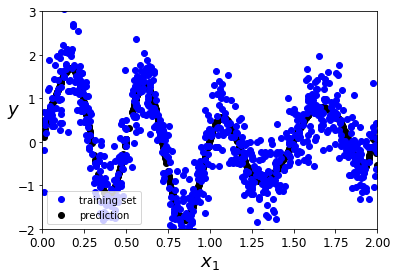

In [93]:
# grafik menunjukkan overfitting
plt.scatter(x_train, train_y_predict, color='k', label="prediction")
plt.plot(x_train, y_train, "bo",label='training set') # training set



plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, -2,3])

plt.legend(loc='lower left')
plt.show()

In [94]:
lin_reg.intercept_, lin_reg.coef_

(-0.07352939552874115,
 array([ 3.47794228e+01, -6.13235126e+02,  7.18055659e+03, -4.27629570e+04,
         1.27265730e+05, -1.83496910e+05,  8.13728434e+04,  8.38875178e+04,
        -6.88021438e+04, -5.75977053e+04,  4.28992521e+04,  5.11952157e+04,
        -2.26512621e+04, -5.03166099e+04,  5.45961967e+03,  5.09310069e+04,
         1.17752535e+04, -4.98329209e+04, -2.67594200e+04,  4.92664214e+04,
         3.39100624e+04, -5.86439055e+04, -1.96495638e+04,  8.15884219e+04,
        -7.04550909e+04,  3.22312539e+04, -8.61128816e+03,  1.27698859e+03,
        -8.17807241e+01]))

In [95]:
lin_reg.intercept_, np.transpose(lin_reg.coef_)

(-0.07352939552874115,
 array([ 3.47794228e+01, -6.13235126e+02,  7.18055659e+03, -4.27629570e+04,
         1.27265730e+05, -1.83496910e+05,  8.13728434e+04,  8.38875178e+04,
        -6.88021438e+04, -5.75977053e+04,  4.28992521e+04,  5.11952157e+04,
        -2.26512621e+04, -5.03166099e+04,  5.45961967e+03,  5.09310069e+04,
         1.17752535e+04, -4.98329209e+04, -2.67594200e+04,  4.92664214e+04,
         3.39100624e+04, -5.86439055e+04, -1.96495638e+04,  8.15884219e+04,
        -7.04550909e+04,  3.22312539e+04, -8.61128816e+03,  1.27698859e+03,
        -8.17807241e+01]))

In [96]:
train_mse=sklearn.metrics.mean_squared_error(y_train, train_y_predict)

In [97]:
valid_x_poly = poly_features.fit_transform(x_valid)
valid_y_predict=lin_reg.predict(valid_x_poly)
test_mse=sklearn.metrics.mean_squared_error(y_valid, valid_y_predict)

In [98]:
report_train_mse[derajat_polinom]=train_mse
report_test_mse[derajat_polinom]=test_mse
report_train_mse

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.24526812,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [99]:
report_test_mse

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.2772755,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 

In [100]:
# Load data test
data_test = pd.read_csv('el4233-2018-2019-02-01-test.csv', header = None)
x_test = data_test[1][:, np.newaxis]

# Input test data to the model
test_x_poly = poly_features.fit_transform(x_test)

# Produce the output of the test
test_y_predict = lin_reg.predict(test_x_poly)

print(test_y_predict)
test_y_predict.shape

[-1.19420435 -0.59191406  1.31617797 ...  1.30741163  0.30849444
  0.55112803]


(2000,)

In [101]:
print(data_test)

         0         1
0        0  0.412077
1        1  1.408084
2        2  0.597636
3        3  1.057357
4        4  0.174777
5        5  1.711870
6        6  1.681215
7        7  0.206816
8        8  1.776814
9        9  0.383256
10      10  0.632508
11      11  1.180341
12      12  1.755183
13      13  1.599650
14      14  0.153841
15      15  1.036084
16      16  1.088464
17      17  0.975142
18      18  1.455828
19      19  0.423218
20      20  1.449753
21      21  0.185377
22      22  0.379857
23      23  0.347664
24      24  0.676826
25      25  1.291469
26      26  0.951091
27      27  1.537486
28      28  0.642298
29      29  1.396314
...    ...       ...
1970  1970  1.232540
1971  1971  0.855154
1972  1972  0.549545
1973  1973  1.419557
1974  1974  0.301493
1975  1975  1.738501
1976  1976  0.287033
1977  1977  1.749606
1978  1978  0.965210
1979  1979  1.115178
1980  1980  1.313522
1981  1981  0.700982
1982  1982  1.555959
1983  1983  0.818487
1984  1984  1.506208
1985  1985  0

In [102]:
data_test[2] = pd.Series(test_y_predict)
print(data_test)
data_test = data_test.iloc[:, 1:3]
data_test.to_csv('result.csv', header=None)

         0         1         2
0        0  0.412077 -1.194204
1        1  1.408084 -0.591914
2        2  0.597636  1.316178
3        3  1.057357  0.542153
4        4  0.174777  1.697804
5        5  1.711870  0.747947
6        6  1.681215  0.789964
7        7  0.206816  1.512084
8        8  1.776814  0.476397
9        9  0.383256 -1.231034
10      10  0.632508  1.250264
11      11  1.180341 -0.173025
12      12  1.755183  0.604930
13      13  1.599650  0.682244
14      14  0.153841  1.677486
15      15  1.036084  0.430766
16      16  1.088464  0.549556
17      17  0.975142 -0.306092
18      18  1.455828 -0.295312
19      19  0.423218 -1.118719
20      20  1.449753 -0.337029
21      21  0.185377  1.666295
22      22  0.379857 -1.219774
23      23  0.347664 -0.955174
24      24  0.676826  0.724166
25      25  1.291469 -0.893215
26      26  0.951091 -0.695888
27      27  1.537486  0.319893
28      28  0.642298  1.173340
29      29  1.396314 -0.653151
...    ...       ...       ...
1970  19